In [1]:
# import np plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import  SHOscillator_FokkerPlankAnalytical/results/TimeScaling/Ds.npy, .. energies.npy .. energies_std.npy ...times.npy Ns.npy
FokkerPlank_Ds = np.load('SHOscillator_FokkerPlankAnalytical/results/TimeScaling/Ds.npy')
FokkerPlank_energies = np.load('SHOscillator_FokkerPlankAnalytical/results/TimeScaling/energies.npy')
FokkerPlank_energies_std = np.load('SHOscillator_FokkerPlankAnalytical/results/TimeScaling/energies_std.npy')
FokkerPlank_times = np.load('SHOscillator_FokkerPlankAnalytical/results/TimeScaling/times.npy')
FokkerPlank_Ns = np.load('SHOscillator_FokkerPlankAnalytical/results/TimeScaling/Ns.npy')

# the same but from SHOscillator_MetropolisAnalytical
Metropolis_Ds = np.load('SHOscillator_MetropolisAnalytical/results/TimeScaling/Ds.npy')
Metropolis_energies = np.load('SHOscillator_MetropolisAnalytical/results/TimeScaling/energies.npy')
Metropolis_energies_std = np.load('SHOscillator_MetropolisAnalytical/results/TimeScaling/energies_std.npy')
Metropolis_times = np.load('SHOscillator_MetropolisAnalytical/results/TimeScaling/times.npy')
Metropolis_Ns = np.load('SHOscillator_MetropolisAnalytical/results/TimeScaling/Ns.npy')

# the same but from SHOscillator_MetropolisNumerical
MetropolisNumerical_Ds = np.load('SHOscillator_MetropolisNumerical/results/TimeScaling/Ds.npy')
MetropolisNumerical_energies = np.load('SHOscillator_MetropolisNumerical/results/TimeScaling/energies.npy')
MetropolisNumerical_energies_std = np.load('SHOscillator_MetropolisNumerical/results/TimeScaling/energies_std.npy')
MetropolisNumerical_times = np.load('SHOscillator_MetropolisNumerical/results/TimeScaling/times.npy')
MetropolisNumerical_Ns = np.load('SHOscillator_MetropolisNumerical/results/TimeScaling/Ns.npy')


# Compare Walkers
In this notebook we compare the varius walker for the same problem, as integrator of the energy for a non optimal value of $\alpha$ as a function of the dimension of the system (dimension and number of particles).

## Compare energy
Compare the energy of the system for the different walkers.

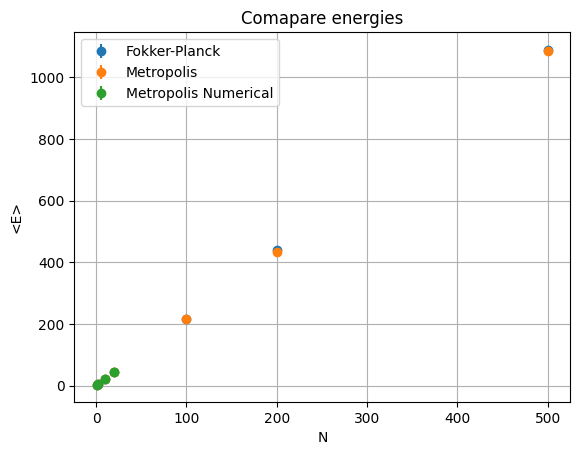

In [13]:
# errorbar of the energies with err = energies_std
plt.figure()
plt.errorbar(FokkerPlank_Ns, FokkerPlank_energies[:,2], yerr=FokkerPlank_energies_std[:,2], label='Fokker-Planck', fmt='o')
plt.errorbar(Metropolis_Ns, Metropolis_energies[:,2], yerr=Metropolis_energies_std[:,2], label='Metropolis', fmt='o')
plt.errorbar(MetropolisNumerical_Ns, MetropolisNumerical_energies[:,2], yerr=MetropolisNumerical_energies_std[:,2], label='Metropolis Numerical', fmt='o')
plt.xlabel('N')
plt.ylabel('<E>')
plt.legend()
plt.title('Comapare energies')
plt.grid()

Text(0, 0.5, 'Energy residue')

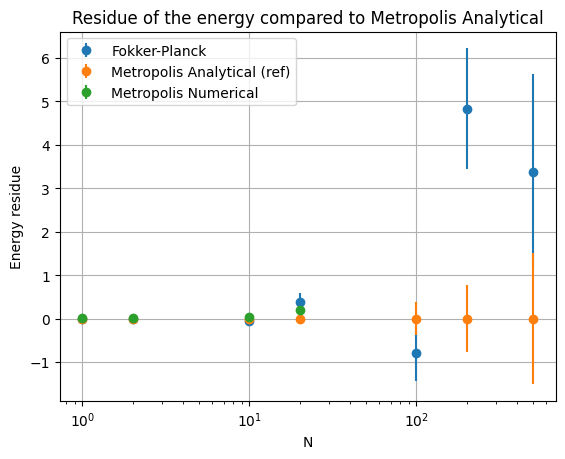

In [6]:
# plot errorbar of the residue compared to metropolis
plt.figure()
plt.errorbar(FokkerPlank_Ns, FokkerPlank_energies[:,2] - Metropolis_energies[:,2], yerr=FokkerPlank_energies_std[:,2], label='Fokker-Planck', fmt='o')
plt.errorbar(Metropolis_Ns, Metropolis_energies[:,2] - Metropolis_energies[:,2], yerr=Metropolis_energies_std[:,2], label='Metropolis Analytical (ref)', fmt='o')
plt.errorbar(MetropolisNumerical_Ns, MetropolisNumerical_energies[:,2] - Metropolis_energies[:4,2], yerr=MetropolisNumerical_energies_std[:,2], label='Metropolis Numerical', fmt='o')
plt.xscale('log')
plt.grid()
# legend to the left
plt.legend(loc='upper left')
plt.title('Residue of the energy compared to Metropolis Analytical')
plt.xlabel('N')
plt.ylabel('Energy residue')

## Compare std
Here we compare the error on the mean energy for each different walker. For error on the mean we use the error given by the blocking algorithm. We compare the error on the mean for the same number of steps for each walker.

Text(0.5, 1.0, 'Standard deviation of the mean energy as a function of N (3D)')

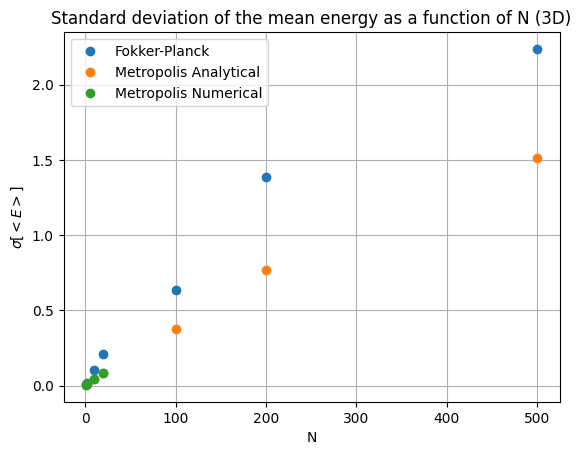

In [7]:
plt.plot(FokkerPlank_Ns, FokkerPlank_energies_std[:,2], 'o', label='Fokker-Planck')
plt.plot(Metropolis_Ns, Metropolis_energies_std[:,2], 'o', label='Metropolis Analytical')
plt.plot(MetropolisNumerical_Ns, MetropolisNumerical_energies_std[:,2], 'o', label='Metropolis Numerical')
plt.xlabel('N')
# use latex for ylabel: \sigma[<E>]
plt.ylabel(r'$\sigma[<E>]$')
plt.grid()
plt.legend()
plt.title('Standard deviation of the mean energy as a function of N (3D)')

## Time of execution
We compare the time of execution for the different walkers.

b

Text(0, 0.5, 'Time [s]')

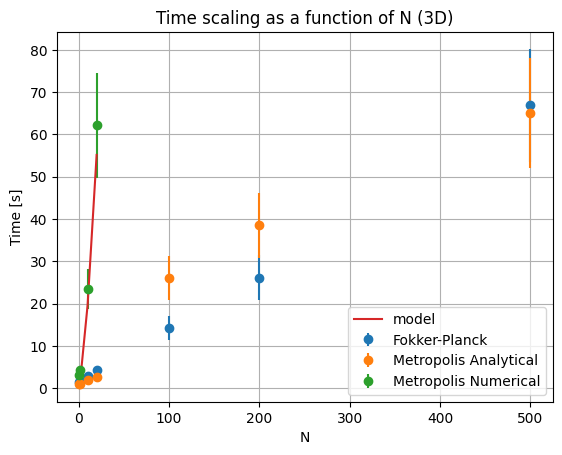

In [10]:
# plot the time, adding an errorbar of 0.2 relative to the time
plt.figure()
plt.errorbar(FokkerPlank_Ns, FokkerPlank_times[:,2], yerr=0.2*FokkerPlank_times[:,2], label='Fokker-Planck', fmt='o')
plt.errorbar(Metropolis_Ns, Metropolis_times[:,2], yerr=0.2*Metropolis_times[:,2], label='Metropolis Analytical', fmt='o')
plt.errorbar(MetropolisNumerical_Ns, MetropolisNumerical_times[:,2], yerr=0.2*MetropolisNumerical_times[:,2], label='Metropolis Numerical', fmt='o')
# plot a model given by 3*N*Metrpolistime, just the first 4
plt.plot(Metropolis_Ns[:4], Metropolis_Ns[:4]*Metropolis_times[:4,2], label='model')
plt.grid()
plt.legend()
plt.title('Time scaling as a function of N (3D)')
plt.xlabel('N')
plt.ylabel('Time [s]')